## Partie 1 : Création d’un ensemble de données
a) Créez un ensemble de données d’images pour une tâche de classification. Assurez-vous d’avoir
3 catégories et 10 exemples par catégorie. Les photos peuvent provenir d’une recherche web
ou de votre collection de photos personnelles. Organisez votre ensemble de données par
dossier. Le nom de dossier est la catégorie. Séparez également vos images en 2 groupes :
“entraînement” et “validation” et assurez vous que 25% des données sont dans le groupe
validation. Vous devriez obtenir la structure de fichiers suivante pour votre ensemble de
données (Figure 1)
b) Préparer le code dataloader et dataset qui vous permettra d’utiliser vos données pour
entraîner et tester un modèle de classification.
Note: assurez vous de normaliser les couleurs des images correctement tel que requis
pour ImageNet, sinon les performances du réseau préentraîné seront mauvaises.
Note : indiquez clairement la méthode utilisée pour créer votre ensemble de données,
incluant la source des images (ex. google image, Instagram, etc.). Compressez les don-
nées dans un format .zip et partagez-les sur Moodle avec votre devoir complété.

--- Références: https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset

a-

 ##  **Création d' un ensemble de données d’images pour une tâche de classification : Ensemble des données d'images de véhicules:**
 **---Avec 3 catégories: avion (cette classe comprend certains variétés d'avions), bateau (cette classe comprend certains variétés de bateaux) et voiture (cette classe comprend certains variétés de voitures de promenade et des autobus, et des camions à 4 roues): 10 exemples par catégorie (ou le label). Les noms des dossiers est la catégorie.**

 **---Les photos proveniennent d’une recherche sur google.**

**--- Organisation de l' ensemble de données par dossier. Le nom de dossier est la catégorie. Séparation des images en 2 groupes : “entraînement” et “validation” et assurez vous que 25% des données sont dans le groupe validation. Même structure de fichiers que celle de l' ensemble de données (Figure 1)**

In [ ]:
from sklearn.model_selection import train_test_split
import shutil
import os
import random

In [ ]:
chemin = "/content/drive/MyDrive/devoir3_Inf889G/"

In [ ]:
# Séparation des images en 2 groupes:

images = [chemin + 'data2/avion/avion' + str(i) + '.jpeg' for i in range(1, 11)]
images = images + [chemin + 'data2/bateau/bateau' + str(i) + '.jpeg' for i in range(1, 11)]
images = images + [chemin + 'data2/voiture/voiture' + str(i) + '.jpeg' for i in range(1, 11)]
labels = [0]*10 + [1]*10 + [2]*10

# Séparation en ensembles d'entraînement et de validation avec stratification
# 25% des données vont dans l'ensemble de validation, et les proportions des classes sont préservées
random.seed(42)

images_train, images_val, labels_train, labels_val = train_test_split(
    images, labels, test_size=0.25, stratify=labels, random_state=42
)

#print(images_train)
#print(labels_train)

print("Affichage des données d'entraînement: \n")
for chemin_img, label in zip(images_train, labels_train):
  print(label, chemin_img)

print("\n Affichage des données de validation: \n" )


for chemin_img, label in zip(images_train, labels_train):
  print(label, chemin_img)





# Création de la structure des fichiers similaires à celle de la figure 1

for chemin_img in images_train:

  if chemin_img.split('/')[-1].split('.')[0].find('avion') != -1:
     shutil.copy(chemin_img, chemin + 'dataset2/training/avion')
  elif (chemin_img.split('/')[-1].split('.')[0].find('bateau') != -1):
     shutil.copy(chemin_img, chemin + 'dataset2/training/bateau')
  elif chemin_img.split('/')[-1].split('.')[0].find('voiture') != -1:
      shutil.copy(chemin_img, chemin + 'dataset2/training/voiture')

for chemin_img in images_val:

  if chemin_img.split('/')[-1].split('.')[0].find('avion') != -1:
    shutil.copy(chemin_img, chemin + 'dataset2/validation/avion')
  elif chemin_img.split('/')[-1].split('.')[0].find('bateau') != -1:
    shutil.copy(chemin_img, chemin + 'dataset2/validation/bateau')
  elif chemin_img.split('/')[-1].split('.')[0].find('voiture') != -1:
    shutil.copy(chemin_img, chemin + 'dataset2/validation/voiture')





Affichage des données d'entraînement: 

2 /content/drive/MyDrive/devoir3_Inf889G/data2/voiture/voiture7.jpeg
1 /content/drive/MyDrive/devoir3_Inf889G/data2/bateau/bateau7.jpeg
0 /content/drive/MyDrive/devoir3_Inf889G/data2/avion/avion7.jpeg
1 /content/drive/MyDrive/devoir3_Inf889G/data2/bateau/bateau2.jpeg
2 /content/drive/MyDrive/devoir3_Inf889G/data2/voiture/voiture4.jpeg
0 /content/drive/MyDrive/devoir3_Inf889G/data2/avion/avion3.jpeg
2 /content/drive/MyDrive/devoir3_Inf889G/data2/voiture/voiture8.jpeg
0 /content/drive/MyDrive/devoir3_Inf889G/data2/avion/avion4.jpeg
0 /content/drive/MyDrive/devoir3_Inf889G/data2/avion/avion9.jpeg
0 /content/drive/MyDrive/devoir3_Inf889G/data2/avion/avion10.jpeg
1 /content/drive/MyDrive/devoir3_Inf889G/data2/bateau/bateau5.jpeg
1 /content/drive/MyDrive/devoir3_Inf889G/data2/bateau/bateau1.jpeg
2 /content/drive/MyDrive/devoir3_Inf889G/data2/voiture/voiture10.jpeg
0 /content/drive/MyDrive/devoir3_Inf889G/data2/avion/avion2.jpeg
2 /content/drive/MyDrive

b- Préparation du code dataloader et dataset qui permettra d’utiliser les données pour entraîner et tester un modèle de classification.

In [ ]:
!pip install torch torchvision pillow


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from PIL import Image
import os


In [ ]:

# Chemin vers les dossiers contenant les images
#dossiers = [chemin + 'data2/autobus', chemin + 'data/automobile', chemin + 'data/vehicule_urgence']

dossiers = [chemin + 'data2/avion', chemin + 'data2/bateau', chemin + 'data2/voiture']


# Transformation pour redimensionner et normaliser les images
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Redimensionnement des images à 224x224
    transforms.ToTensor(),          # Convertion des images en tenseur PyTorch
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalisation des images
])



In [ ]:
import os
from PIL import Image
from torch.utils.data import Dataset

class MonDatasetImages(Dataset):
    def __init__(self, dossier_racine, type_ensemble, transform=None):
        """
        Initialisation du Dataset.

        Args:
            dossier_racine (str): Chemin du dossier racine du dataset.
            type_ensemble (str): Type de l'ensemble, 'training' ou 'validation'.
            transform (callable, optional): Transformations à appliquer sur les images.
        """
        self.transform = transform
        self.samples = []  # Liste pour stocker les chemins des images et leurs étiquettes
       # self.classes = ['automobile', 'urgence', 'autobus']  # differents classes

        self.classes = ['avion', 'bateau', 'voiture']  # differents classes


        chemin_ensemble = os.path.join(dossier_racine, type_ensemble)

        if not os.path.isdir(chemin_ensemble):
            raise ValueError(f"Le chemin spécifié '{chemin_ensemble}' n'existe pas.")

        for idx, classe in enumerate(self.classes):
            chemin_classe = os.path.join(chemin_ensemble, classe)
            if not os.path.isdir(chemin_classe):
                print(f"Attention: Le dossier '{chemin_classe}' n'existe pas ou ne contient pas d'images.")
                continue
            for fname in os.listdir(chemin_classe):
                if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
                    self.samples.append((os.path.join(chemin_classe, fname), idx))

        if not self.samples:
            raise ValueError(f"Aucune image trouvée dans '{chemin_ensemble}'. ")

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_path, label = self.samples[idx]
        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        return image, label


In [ ]:
from torchvision import transforms
from torch.utils.data import DataLoader

chemin_dossier_racine = chemin + 'dataset2/'

# Transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Redimensionnement des images à 224x224
    transforms.ToTensor(),          # Conversion des images en tenseur PyTorch
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalisation des images
])

# Création de l'objet dataset pour l'entrainement

dataset_entrainement = MonDatasetImages(dossier_racine=chemin_dossier_racine, type_ensemble ='training', transform=transform)

# Création de l'objet dataset pour la validation

dataset_validation = MonDatasetImages(dossier_racine=chemin_dossier_racine, type_ensemble = 'validation', transform=transform)

# Création de l'objet dataloader pour l'entrainement

data_loader_entrainement = DataLoader(dataset_entrainement, batch_size=32, shuffle=True)

# Création de l'objet dataloader pour la validation

data_loader_validation = DataLoader(dataset_validation, batch_size=32, shuffle=True)


## Partie 2 : Réseau préentraîné
a) Téléchargez le réseau préentraîné VGG16 depuis torchvision.

b) Essayer le réseau avec vos propres données. Y a-t-il des résultats surprenants ? Pouvez-vous
caractériser les types les plus fréquents d’erreur qui affectent le réseau ?
c) Créer une “matrice de confusion” indiquant quelles catégories sont classifiées comme une
autre catégorie.

--- Références

In [ ]:
!pip install torch torchvision


a) Téléchargement du réseau vgg16

In [ ]:
import os
import torch
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim


chemin_dossier_racine = chemin + 'dataset/'


# Adaptation du modèle VGG16
vgg16 = models.vgg16(pretrained=True)


# Suppression du gel des couches convolutives
for param in vgg16.features.parameters():
    param.requires_grad = True

# Remplacement de la dernière couche par une couche de 3 classes
num_features = vgg16.classifier[6].in_features
vgg16.classifier[6] = nn.Linear(num_features, 3)  # 3 est le nombre de vos classes

# Utilisation de CUDA si disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vgg16 = vgg16.to(device)

# Critère de perte et Optimiseur
criterion = nn.CrossEntropyLoss()
# Ajustement de l'optimiseur avec un taux d'apprentissage plus faible
optimizer = optim.SGD(vgg16.parameters(), lr=0.0001, momentum=0.9)


# Fonction d'entraînement
def train_model(model, criterion, optimizer, data_loader_entrainement, data_loader_validation, num_epochs=10):
    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        # Chaque époque a une phase d'entraînement et une phase de validation
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Mode d'entraînement
                dataloader = data_loader_entrainement
            else:
                model.eval()   # Mode d'évaluation
                dataloader = data_loader_validation

            running_loss = 0.0
            running_corrects = 0

            # Itérer sur les données.
            for inputs, labels in dataloader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Zéro les gradients des paramètres
                optimizer.zero_grad()

                # forward
                # Suivre l'historique si seulement en train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize seulement si en phase d'entraînement
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistiques
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloader.dataset)
            epoch_acc = running_corrects.double() / len(dataloader.dataset)

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

    print('Entraînement terminé')
    return model
# b) Essaie du réseau vgg16: entrainement du modèle
# Entraînement du modèle
model_trained = train_model(vgg16, criterion, optimizer, data_loader_entrainement, data_loader_validation, num_epochs=16)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/16
----------
train Loss: 1.3062 Acc: 0.2273
val Loss: 1.0025 Acc: 0.5000
Epoch 2/16
----------
train Loss: 1.0875 Acc: 0.4091
val Loss: 0.9793 Acc: 0.5000
Epoch 3/16
----------
train Loss: 1.0786 Acc: 0.4091
val Loss: 0.9478 Acc: 0.6250
Epoch 4/16
----------
train Loss: 1.0649 Acc: 0.4545
val Loss: 0.9101 Acc: 0.7500
Epoch 5/16
----------
train Loss: 1.0687 Acc: 0.3636
val Loss: 0.8689 Acc: 0.7500
Epoch 6/16
----------
train Loss: 0.8586 Acc: 0.7273
val Loss: 0.8264 Acc: 0.7500
Epoch 7/16
----------
train Loss: 0.9018 Acc: 0.5000
val Loss: 0.7828 Acc: 0.8750
Epoch 8/16
----------
train Loss: 0.9157 Acc: 0.5455
val Loss: 0.7390 Acc: 0.8750
Epoch 9/16
----------
train Loss: 0.6251 Acc: 0.8636
val Loss: 0.6968 Acc: 0.8750
Epoch 10/16
----------
train Loss: 0.6784 Acc: 0.8182
val Loss: 0.6557 Acc: 0.8750
Epoch 11/16
----------
train Loss: 0.5233 Acc: 0.9091
val Loss: 0.6174 Acc: 0.8750
Epoch 12/16
----------
train Loss: 0.5258 Acc: 0.8636
val Loss: 0.5812 Acc: 0.8750
Epoch 13/16
-

--- c) Création de la “matrice de confusion” indiquant quelles catégories sont classifiées comme une autre catégorie.

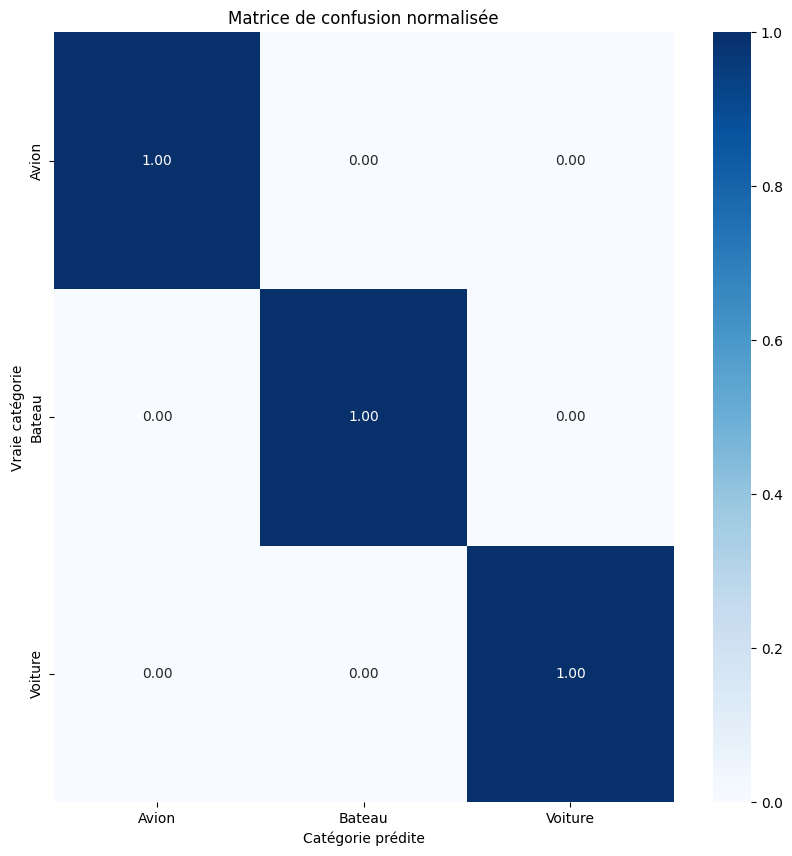

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


def generate_confusion_matrix(model, dataloader, device):
    y_pred = []
    y_true = []

    model.eval()  # Mode d'évaluation
    with torch.no_grad():  # Pas besoin de calculer les gradients
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            y_pred.extend(preds.cpu().numpy())  # Stocker les prédictions
            y_true.extend(labels.cpu().numpy())  # Stocker les vraies étiquettes

    # Calculer la matrice de confusion
    conf_mat = confusion_matrix(y_true, y_pred)

    # Normaliser la matrice de confusion
    conf_mat_norm = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

    # Afficher la matrice de confusion
    plt.figure(figsize=(10, 10))
    sns.heatmap(conf_mat_norm, annot=True, fmt=".2f", cmap='Blues',
                xticklabels=['Avion', 'Bateau', 'Voiture'],
                yticklabels=['Avion', 'Bateau', 'Voiture'])
    plt.ylabel('Vraie catégorie')
    plt.xlabel('Catégorie prédite')
    plt.title('Matrice de confusion normalisée')
    plt.show()

# Après l'entraînement du modèle
generate_confusion_matrix(model_trained, data_loader_validation, device)


### Résultats surprenants et les types les plus fréquents d’erreur qui affectent le réseau

---

--- La précision de validation du modèle surpasse légèrement celle de la précision d'entrainement au niveau de certains époques: Il semblerait y avoir un sur-apprentissage vu ce résultat inattendue et anormale.

--- On voit aussi que la classe ... a été mal classée par le modèle avec un pourcentage de ...

--- Par ailleurs, on peut noter que le modèle s'est améliorer  de facon progressive durant son apprentissage mais le score finale de la précision pour la validation est de 100%: Ce qui indique que le modèle serait très performant.

--- Pour ce faire on testera sur un autre ensemble de données afin de confirmer cela.


--- D'après les résultats obtenus de la matrice de confusion, on peut noter qu'il n' y a eu aucune confusion de prédiction au niveau de toutes les classes.

--- On voit que la précision pour validation surpasse celle de l'entrainement.

--- Afin de s'assurer que le modèle généralise bien la prédiction, on va le tester sur d'autres données: Testons le modèle sur d'autres nouveaux données de test


**-- Test du modèle sur des nouvelles données**

In [ ]:
# Chargement des données de test

from torchvision import transforms
from torch.utils.data import DataLoader

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Chemin vers le dossier contenant les données de test
chemin_dossier_racine = chemin + 'dataset2/'



dataset_test = MonDatasetImages(dossier_racine=chemin_dossier_racine, type_ensemble= "test", transform=transform)

def custom_collate_fn(batch):
    images, labels = zip(*batch)

    # Convertit les images en tensor
    images = torch.stack(images, dim=0)

    # Convertit les labels en indices numériques, puis en tensor
    labels = torch.tensor([class_to_index[label] if isinstance(label, str) else label for label in labels], dtype=torch.long)

    return images, labels

data_loader_test = DataLoader(dataset_test, batch_size=32, shuffle=True, collate_fn=custom_collate_fn)


In [ ]:
# Fonction d'évaluation du modèle

def evaluate_model(model, data_loader, device):
    model.to(device)
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy sur le nouveau data set: {accuracy:.2f}%')

In [ ]:
# Déterminer le périphérique à utiliser
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Appeler la fonction d'évaluation avec le modèle formé et le nouveau DataLoader
evaluate_model(model_trained, data_loader_test, device)

Accuracy sur le nouveau data set: 75.00%


--- On obtient ainsi une precision de 75 % pour les nouveaux données de proche de la precision de celle de l'entainement de 100 %: Ce qui confirme que le modèle a une bonne performance d'apprentissage et qu'il generalise bien la prédiction.

## Partie 3 : Transfert d’apprentissage
d) Après l’analyse de la performance de votre réseau préentraîné, essayez de le réentraîner en
fixant (freezing) les premières couches du réseau pour n’entraîner que les dernières couches.
Quelle performance obtenez-vous?
e) Recalculez la matrice de confusion pour chaque entraînement afin de quantifier les erreurs
de classification. Indiquez également les performances sur l’ensemble d’entraînement et
l’ensemble de validation. Aﬀichez les courbes d’apprentissage.

--- Références

d) Ré-entraînement du modèle en fixant (freezing) les premières couches du réseau pour n’entraîner que les dernières couches.

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/10
----------
train Loss: 1.2031 Acc: 0.2273
val Loss: 1.2081 Acc: 0.1250
Epoch 2/10
----------
train Loss: 1.2849 Acc: 0.3182
val Loss: 0.9996 Acc: 0.5000
Epoch 3/10
----------
train Loss: 1.0735 Acc: 0.4091
val Loss: 0.7774 Acc: 0.7500
Epoch 4/10
----------
train Loss: 0.5261 Acc: 0.8182
val Loss: 0.6004 Acc: 0.8750
Epoch 5/10
----------
train Loss: 0.3829 Acc: 0.8636
val Loss: 0.4688 Acc: 1.0000
Epoch 6/10
----------
train Loss: 0.2688 Acc: 0.9091
val Loss: 0.3731 Acc: 1.0000
Epoch 7/10
----------
train Loss: 0.1343 Acc: 1.0000
val Loss: 0.3025 Acc: 1.0000
Epoch 8/10
----------
train Loss: 0.0821 Acc: 1.0000
val Loss: 0.2488 Acc: 1.0000
Epoch 9/10
----------
train Loss: 0.0565 Acc: 1.0000
val Loss: 0.2075 Acc: 1.0000
Epoch 10/10
----------
train Loss: 0.0578 Acc: 1.0000
val Loss: 0.1741 Acc: 1.0000
Entraînement terminé


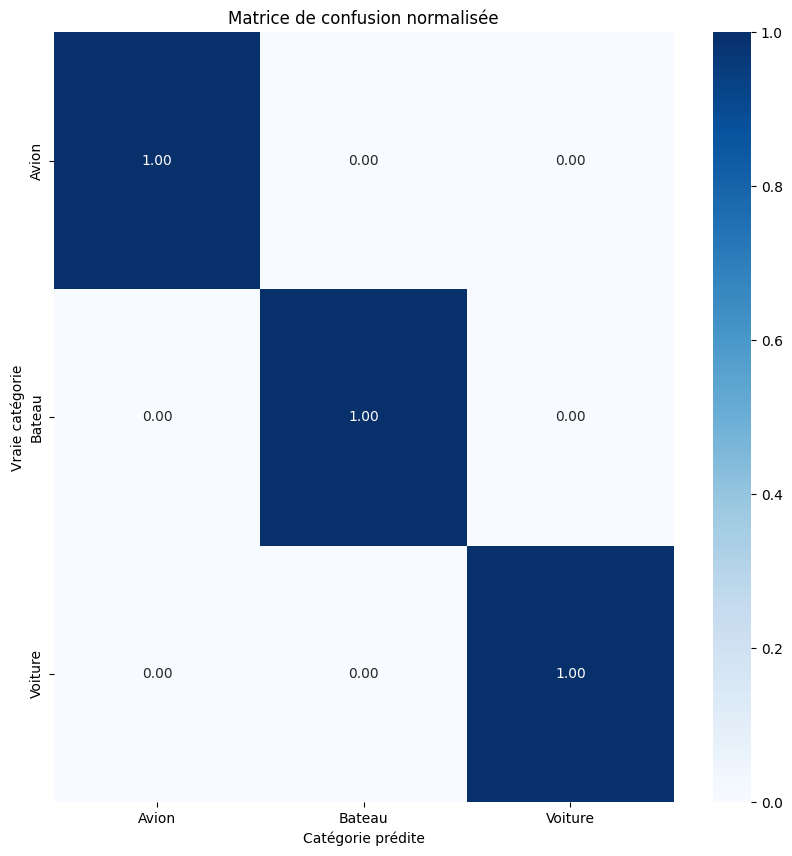

In [ ]:
import os
import torch
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Adaptation du modèle VGG16 avec les premières couches gelées
vgg16 = models.vgg16(pretrained=True)
for param in vgg16.features.parameters():
    param.requires_grad = False  # Geler les couches convolutives

num_features = vgg16.classifier[6].in_features
vgg16.classifier[6] = nn.Linear(num_features, 3)  # Adapter pour 3 classes

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vgg16.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(vgg16.classifier[6].parameters(), lr=0.001, momentum=0.9)  # Optimisation de la dernière couche uniquement
 # Dictionnaire pour stocker l'historique de la performance
history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
def train_model(model, criterion, optimizer, num_epochs=10):

    #history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Mode d'entraînement
                dataloader = data_loader_entrainement
            else:
                model.eval()   # Mode d'évaluation
                dataloader = data_loader_validation

            running_loss = 0.0
            running_corrects = 0
            total_samples = 0

            for inputs, labels in dataloader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                # forward
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize seulement si en phase d'entraînement
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                total_samples += inputs.size(0)

            epoch_loss = running_loss / total_samples
            epoch_acc = running_corrects.double() / total_samples

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # Enregistrer l'historique de la performance
            history[f'{phase}_loss'].append(epoch_loss)
            history[f'{phase}_acc'].append(epoch_acc)

    print('Entraînement terminé')
    return model, history


model_trained, model_history = train_model(vgg16, criterion, optimizer, num_epochs=10)


# Génération de la matrice de confusion pour l'ensemble de validation
generate_confusion_matrix(model_trained, data_loader_validation, device)



--- On peut noter le ré-entrainement du modèle avec le freezing donne une performance parfaite avec un score de 100% pour la validation et ce même résultat est obtenu pour toute nouvelle exécution du code, contrairement l'entrainement du modèle sans le freezing ou chaque nouvelle exécution du code donnait de différents prédictions et score de validation.

--- Aussi, il faut noter que le score de la validation surpasse celui de l'entrainement sur plusieurs époques

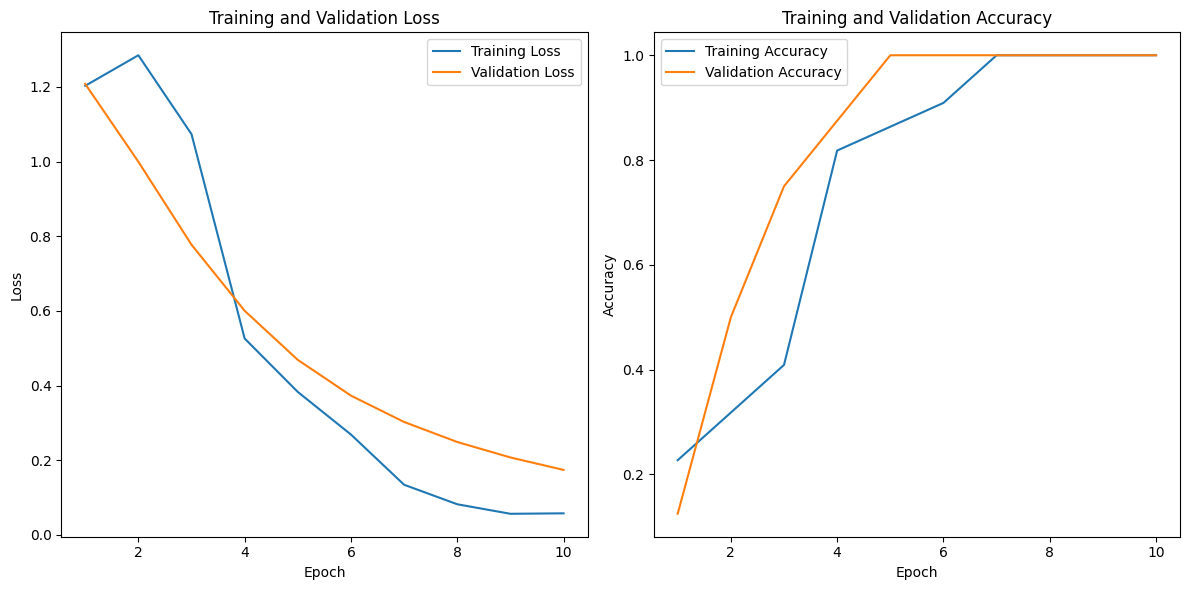

In [ ]:
import matplotlib.pyplot as plt

import torch

def plot_learning_curves(history):
    epochs_range = range(1, len(history['train_loss']) + 1)

    plt.figure(figsize=(12, 6))

    # S'assurer que les données sont sur le CPU et converties en numpy si nécessaire
    train_loss = [x.detach().cpu().numpy() if torch.is_tensor(x) else x for x in history['train_loss']]
    val_loss = [x.detach().cpu().numpy() if torch.is_tensor(x) else x for x in history['val_loss']]
    train_acc = [x.detach().cpu().numpy() if torch.is_tensor(x) else x for x in history['train_acc']]
    val_acc = [x.detach().cpu().numpy() if torch.is_tensor(x) else x for x in history['val_acc']]

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, train_acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()



plot_learning_curves(history)

Les courbes d'apprentissage confirme l'analyse éffectuée

## Partie 4 : Perturbation
a) Modifiez vos images pour les perturber en ajoutant un petit carré dans le coin supérieur
gauche de l’image, où chaque couleur du carré est unique pour chaque étiquette comme
montré à la figure 2.
Note : au lieu de créer un nouvel ensemble de données pour cet exercice, créez plutôt
un nouveau dataloader qui modifiera les images lorsqu’elles sont lues en leur ajoutant
le carré de couleur.
Figure 2: Exemple de perturbations. Pour l’entraînement, la couleur de la perturbation est la même
pour chaque image d’une même classe (ex. rouge pour “cheddar”, vert pour “pâte demi-ferme”).
Lors de la validation, une couleur aléatoire est assignée à chaque image.
b) En utilisant votre modèle de classification d’images, entraînez-le à nouveau avec les images
perturbées. Aﬀichez les courbes d’apprentissage, les performances finales sur l’ensemble
d’entraînement et de validation, et la matrice de confusion.
c) Attaque adversérielle : Est-ce que le modèle est surajusté (overfit) pour la couleur du carré
et ignore le reste de l’image? Lors de l’évaluation du modèle sur les données d’entraînement
INF889G - H2024
3Devoir 3
et de validation, essayez de permuter les couleurs de manière aléatoire entre différentes éti-
quettes. Expliquez quelles sont les précautions à considérer lors de la création des ensembles
de données et de l’interprétation des résultats du modèle en considérant cette “attaque ad-
versérielle”.

--- Références

a) Modifions vos images pour les perturber en ajoutant un petit carré dans le coin supérieur gauche de l’image, où chaque couleur du carré est unique pour chaque étiquette comme montré à la figure 2. Note : au lieu de créer un nouvel ensemble de données pour cet exercice, créez plutôt un nouveau dataloader qui modifiera les images lorsqu’elles sont lues en leur ajoutant le carré de couleur. \\
--- Dans notre cas, les trois classes sont: la classe avion, la classe bateau et la classe voiture: \\
-- Pour les données d'entrainement,\\
- ajoutons un carré rouge au coin supérieur gauche pour la classe avion, \\
- ajoutons un carré vert au coin supérieur gauche pour la classe bateau, \\
- ajoutons un carré bleu au coin supérieur gauche pour la classe voiture.

In [ ]:
import os
from PIL import Image
from torch.utils.data import Dataset

class MonDatasetImages(Dataset):
    def __init__(self, dossier_racine, transform=None):
        self.dossier_racine = dossier_racine
        self.transform = transform
        self.images = []
        self.labels = []

        # Lire les dossiers et les fichiers
        class_folders = os.listdir(dossier_racine)  # Liste de tous les dossiers de classe
        for label in class_folders :
            folder_path = os.path.join(dossier_racine, label)
            if os.path.isdir(folder_path):  # S'assurer que c'est bien un dossier
                for file in os.listdir(folder_path):
                    if file.lower().endswith(('.png', '.jpg', '.jpeg')):  # Filtre pour les fichiers images
                        self.images.append(os.path.join(folder_path, file))
                        self.labels.append(label)  # Ajoute le label basé sur le dossier

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image_path = self.images[idx]
        label = self.labels[idx]
        image = Image.open(image_path).convert('RGB')

        if self.transform:
            image, label = self.transform(image, label)  # Appliquer la transformation si définie

        return image, label


In [ ]:
import os
from PIL import Image, ImageDraw
from torch.utils.data import Dataset
import torchvision.transforms as transforms

# Cette fonction permet d' ajouter un carré coloré dans le coin supérieur gauche en fonction de la classe d'image"""
def ajouterCarreColore(image, label):

    draw = ImageDraw.Draw(image)
    size = (30, 30)  # Taille du carré
    if label == "avion":  # Classe 'avion'
        draw.rectangle([0, 0, size[0], size[1]], fill="red")
    elif label == "bateau":  # Classe 'bateau'
        draw.rectangle([0, 0, size[0], size[1]], fill="green")
    elif label == "voiture":  # Classe 'voiture'
        draw.rectangle([0, 0, size[0], size[1]], fill="blue")
    return image


In [ ]:
from torchvision.transforms import functional as F

""" Cette Classe permet d'appliquer une transformation qui inclut la modification des labels. """

class Transform:

  def __init__(self):
      self.base_transform = transforms.Compose([
          transforms.Resize((224, 224)),
          transforms.ToTensor(),
          transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      ])

  def __call__(self, image, label):
    # Ajout du carré coloré
    image = ajouterCarreColore(image, label)
    # Application des transformations de base
    image = self.base_transform(image)
    return image, label

In [ ]:
transform = Transform()
# Transformation des données d'entrainement en ajoutant un carré coloré plein correspondondante à chaque classe
dataset_entrainement = MonDatasetImages(dossier_racine=chemin_dossier_racine + '/training', transform=transform)

from torch.utils.data.dataloader import default_collate

class_to_index = {'avion': 0, 'bateau': 1, 'voiture': 2}

def custom_collate_fn(batch):
    images, labels = zip(*batch)

    # Convertit les images en tensor
    images = torch.stack(images, dim=0)

    # Convertit les labels en indices numériques, puis en tensor
    labels = torch.tensor([class_to_index[label] if isinstance(label, str) else label for label in labels], dtype=torch.long)

    return images, labels


data_loader_entrainement = DataLoader(dataset_entrainement, batch_size=32, shuffle=True, collate_fn=custom_collate_fn)
#data_loader_entrainement = DataLoader(dataset_entrainement, batch_size=32, shuffle=True)

# Transformation des données de validation en ajoutant un carré coloré plein correspondondante à chaque classe
dataset_validation= MonDatasetImages(dossier_racine=chemin_dossier_racine + '/validation', transform=transform)
data_loader_validation = DataLoader(dataset_validation, batch_size=32, shuffle=True, collate_fn=custom_collate_fn)

Images d'entraînement avec carrés colorés selon la classe:


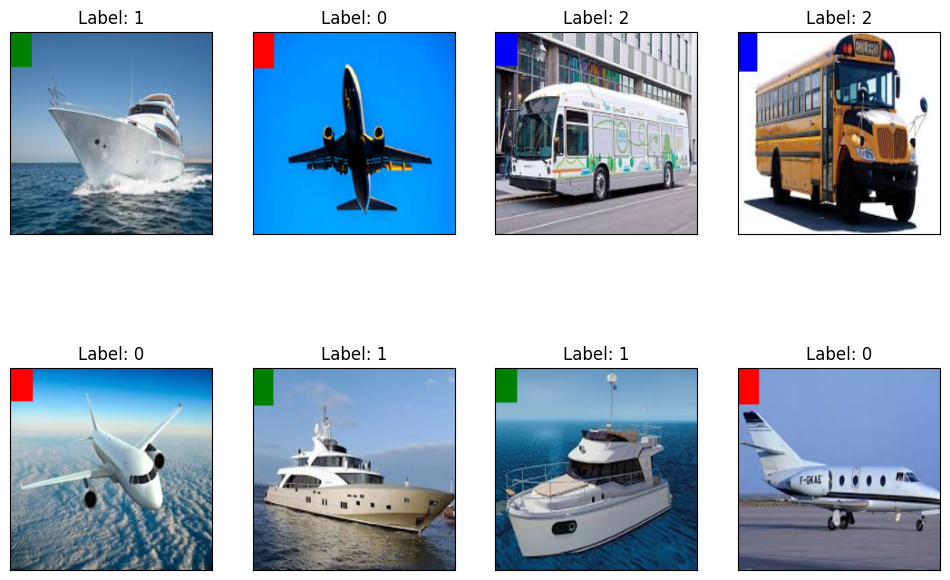

Images de validation avec carrés colorés selon la classe:


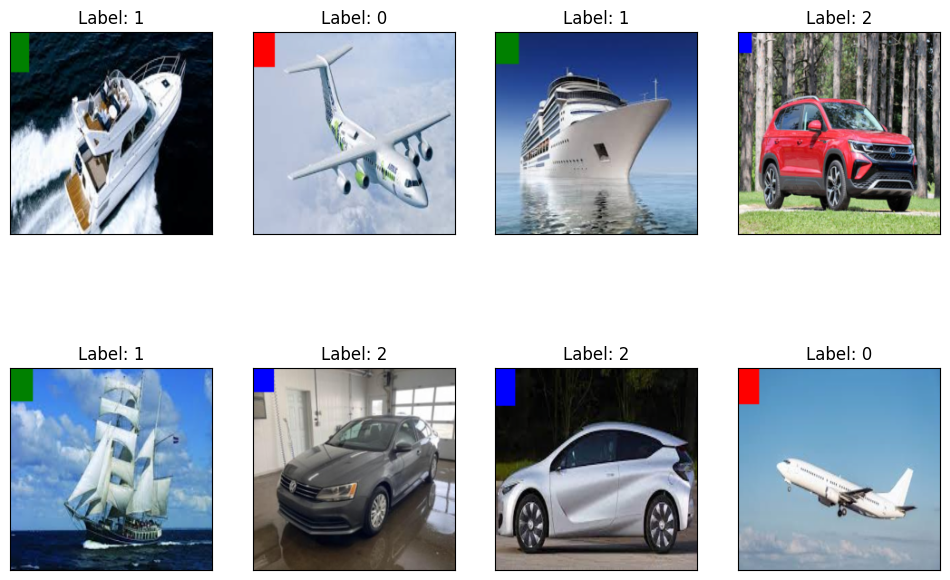

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch

def afficher_image(image):
    """Affiche une image en annulant la normalisation pour un affichage correct."""
    # Convertir de tenseur PyTorch à numpy
    image = image.numpy().transpose((1, 2, 0))
    # Dénormaliser l'image
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = image * std + mean
    image = np.clip(image, 0, 1)  # Assurer que les valeurs sont entre 0 et 1
    plt.imshow(image)

def afficher_images_dataloader(data_loader):
    """Récupère et affiche un batch d'images du DataLoader."""
    # Itérer sur le DataLoader pour obtenir un batch
    images, labels = next(iter(data_loader))

    # Créer une figure avec plusieurs sous-plots
    fig = plt.figure(figsize=(12, 8))
    # Afficher seulement les 8 premières images du batch
    for i in range(min(len(images), 8)):
        ax = fig.add_subplot(2, 4, i + 1, xticks=[], yticks=[])
        afficher_image(images[i])
        ax.set_title(f'Label: {labels[i]}')

    plt.show()

# Utilisation de la fonction pour afficher les images du DataLoader d'entrainement
print("Images d'entraînement avec carrés colorés selon la classe:")
afficher_images_dataloader(data_loader_entrainement)

# Utilisation de la fonction pour afficher les images du DataLoader de validation
print("Images de validation avec carrés colorés selon la classe:")
afficher_images_dataloader(data_loader_validation)


Images de validation avec carrés colorés selon la classe:


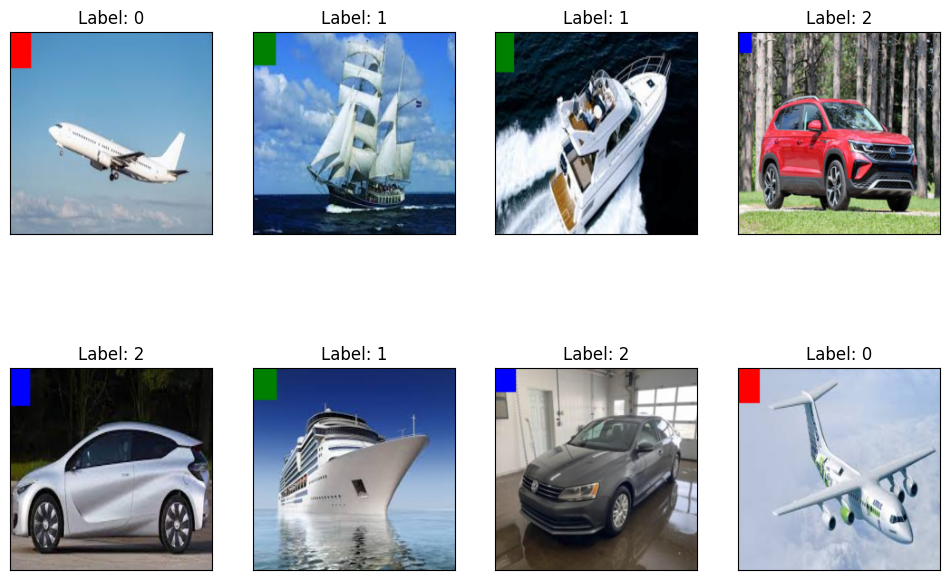

In [ ]:
# Utilisation de la fonction pour afficher les 8 premières images du DataLoader d'entraînement afin de confirmer que la transformation a été effective
print("Images de validation avec carrés colorés selon la classe:")
afficher_images_dataloader(data_loader_validation)
plt.show()

On voit bien que les transformations d'images ont été bien éffectuées

 b) En utilisant votre modèle de classification d’images, entraînez-le à nouveau avec les images perturbées. Aﬀichez les courbes d’apprentissage, les performances finales sur l’ensemble d’entraînement et de validation, et la matrice de confusion.

In [ ]:
for inputs, labels in data_loader_entrainement:
    print(type(inputs), type(labels))

<class 'torch.Tensor'> <class 'torch.Tensor'>


In [ ]:
# Fonction d'entraînement
import torch
from torch import nn, optim

# Assumons que 'device' est déjà défini, par exemple:
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Fonction d'entraînement

def train_model(model, criterion, optimizer, data_loader_entrainement, data_loader_validation, num_epochs=10):
    history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in (data_loader_entrainement if phase == 'train' else data_loader_validation):
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(data_loader_entrainement.dataset if phase == 'train' else data_loader_validation.dataset)
            epoch_acc = running_corrects.double() / len(data_loader_entrainement.dataset if phase == 'train' else data_loader_validation.dataset)

            history[f'{phase}_loss'].append(epoch_loss)
            history[f'{phase}_acc'].append(epoch_acc)

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

    print('Training complete')
    return model, history


In [ ]:
for inputs, labels in data_loader_entrainement:
    print(type(inputs), type(labels))

<class 'torch.Tensor'> <class 'torch.Tensor'>


In [ ]:
# Entrainement du modèle avec les images perturbées

# Adaptation du modèle VGG16 avec les premières couches gelées
vgg16 = models.vgg16(pretrained=True)
for param in vgg16.features.parameters():
    param.requires_grad = False  # Geler les couches convolutives

num_features = vgg16.classifier[6].in_features
vgg16.classifier[6] = nn.Linear(num_features, 3)  # Adapter pour 3 classes

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vgg16.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(vgg16.classifier[6].parameters(), lr=0.001, momentum=0.9)  # Optimisation de la dernière couche uniquement
 # Dictionnaire pour stocker l'historique de la performance
history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}

model_trained, model_history = train_model(vgg16, criterion, optimizer, data_loader_entrainement, data_loader_validation, num_epochs=10)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/10
----------
train Loss: 1.1184 Acc: 0.4545
val Loss: 0.9113 Acc: 0.8750
Epoch 2/10
----------
train Loss: 0.8288 Acc: 0.5909
val Loss: 0.7570 Acc: 0.8750
Epoch 3/10
----------
train Loss: 0.5756 Acc: 0.8182
val Loss: 0.6328 Acc: 1.0000
Epoch 4/10
----------
train Loss: 0.4506 Acc: 0.9091
val Loss: 0.5416 Acc: 1.0000
Epoch 5/10
----------
train Loss: 0.3279 Acc: 0.9545
val Loss: 0.4602 Acc: 1.0000
Epoch 6/10
----------
train Loss: 0.1910 Acc: 0.9545
val Loss: 0.3888 Acc: 1.0000
Epoch 7/10
----------
train Loss: 0.1313 Acc: 1.0000
val Loss: 0.3253 Acc: 1.0000
Epoch 8/10
----------
train Loss: 0.0766 Acc: 1.0000
val Loss: 0.2717 Acc: 1.0000
Epoch 9/10
----------
train Loss: 0.0600 Acc: 1.0000
val Loss: 0.2276 Acc: 1.0000
Epoch 10/10
----------
train Loss: 0.0508 Acc: 1.0000
val Loss: 0.1914 Acc: 1.0000
Training complete


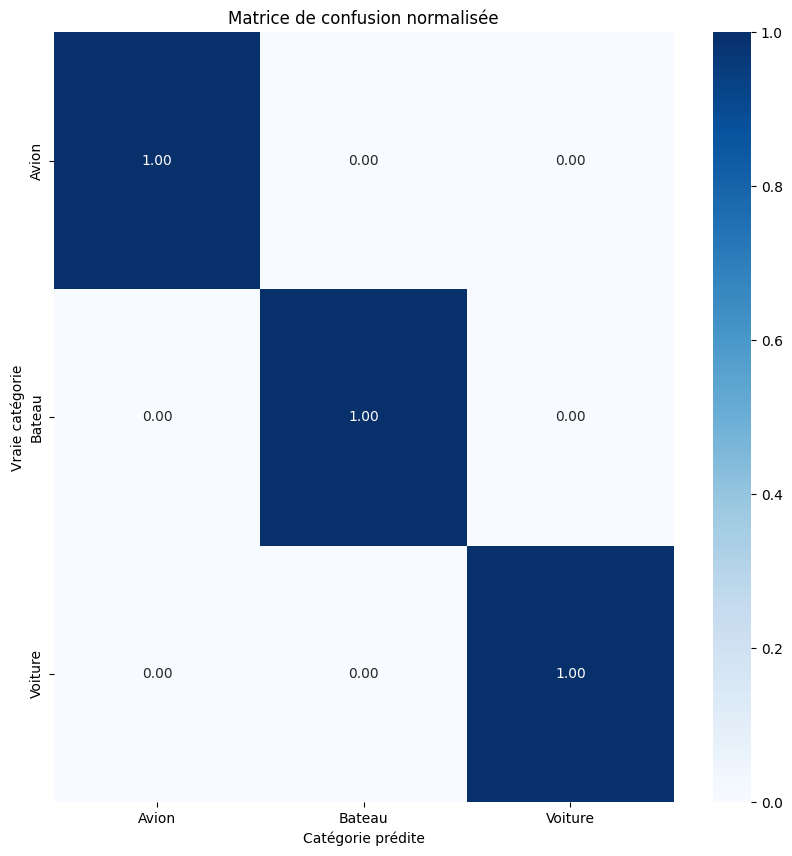

In [ ]:
# Génération de la matrice de confusion pour l'ensemble de validation
generate_confusion_matrix(model_trained, data_loader_validation, device)

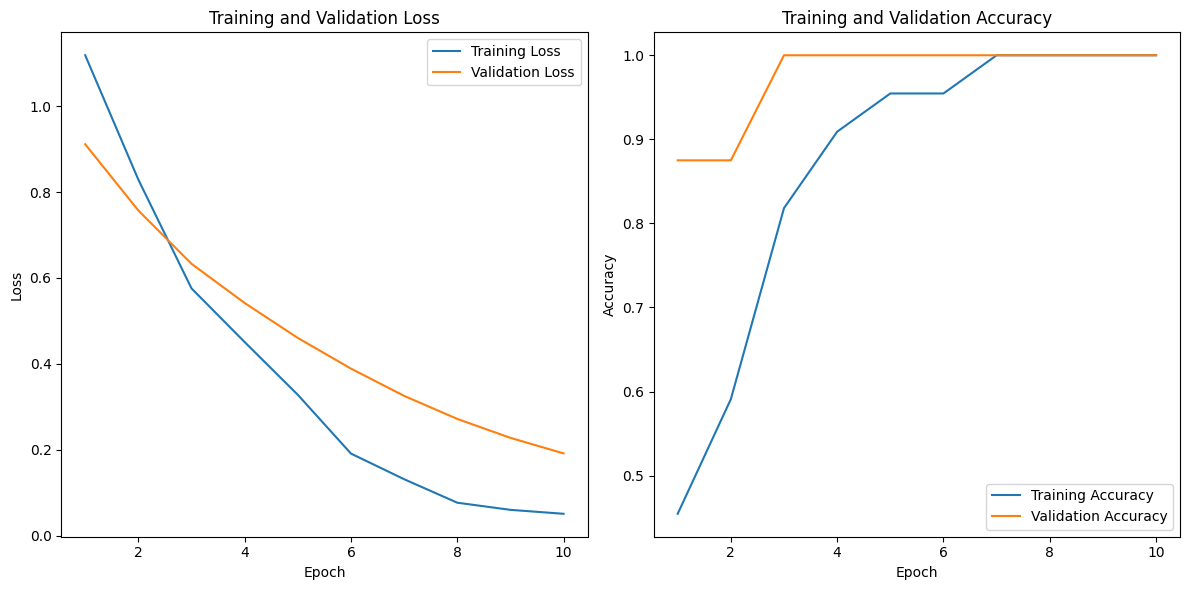

In [ ]:
# courbes d’apprentissage, les performances finales sur l’ensemble d’entraînement et de validation
plot_learning_curves(model_history)

-- Interpretation des résultats obtenus: D'après les résultats obtenus, on peut dire que le modèle généralise bien la prédiction.



### c)** Attaque adversérielle : Est-ce que le modèle est surajusté (overfit) pour la couleur du carré et ignore le reste de l’image? Lors de l’évaluation du modèle sur les données d’entraînement, essayez de permuter les couleurs de manière aléatoire entre différentes éti- quettes. Expliquez quelles sont les précautions à considérer lors de la création des ensembles de données et de l’interprétation des résultats du modèle en considérant cette “attaque adversérielle”.**

In [ ]:
import random
# Cette fonction permet d'ajouter un carré coloré dans le coin supérieur gauche en fonction de la classe d'image"""
# en permutant les couleurs de manière aléatoire entre différentes classes


def ajouterCarreColoreAlea(image, label):

  # Liste de permutation de la liste des couleurs: ["rouge", "vert", "bleue"]
  random.seed(42)  # Définition de la graine pour la reproductibilité
  liste_couleur_alea = ["red", "green", "blue"]
  random.shuffle(liste_couleur_alea) # Permutation aleatoire des couleurs

  draw = ImageDraw.Draw(image)
  size = (30, 30)  # Taille du carré
  if label == "avion":  # Classe 'avion'
    draw.rectangle([0, 0, size[0], size[1]], fill= liste_couleur_alea[0])
  elif label == "bateau":  # Classe 'bateau'
    draw.rectangle([0, 0, size[0], size[1]], fill=  liste_couleur_alea[1])
  elif label == "voiture":  # Classe 'voiture'
    draw.rectangle([0, 0, size[0], size[1]], fill=  liste_couleur_alea[2])

  return image
""" Cette Classe permet d'appliquer les transformations avec permutation aleatoire des couleurs entre les étiquetes """

class Transform_alea:

  def __init__(self):
      self.base_transform = transforms.Compose([
          transforms.Resize((224, 224)),
          transforms.ToTensor(),
          transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      ])

  def __call__(self, image, label):
    # Ajout du carré coloré
    image = ajouterCarreColoreAlea(image, label)
    # Application des transformations de base
    image = self.base_transform(image)
    return image, label

Images d'entrainement avec ajout des carrés colorés  permutées entre les classes avant l'entrainement du modèle


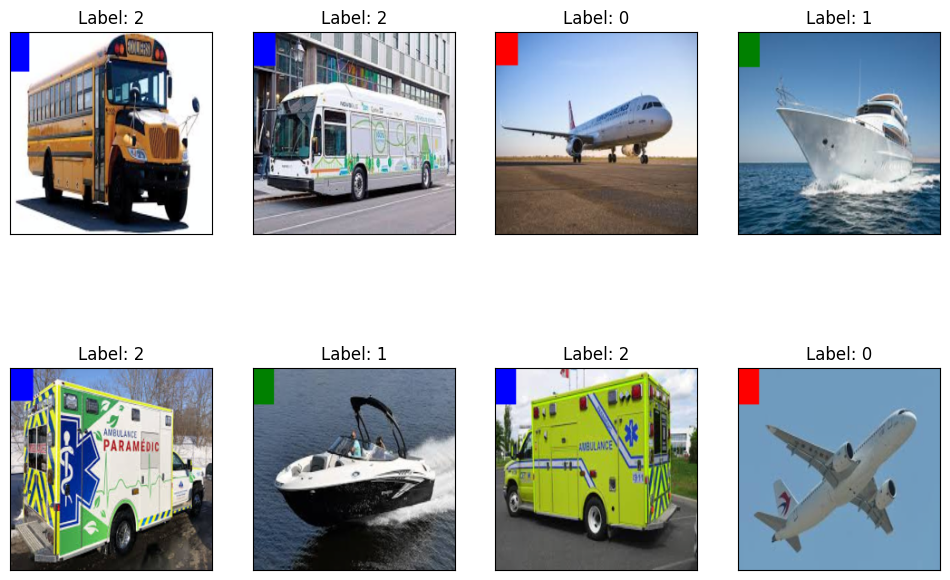

In [ ]:
# Affichage des données d'entrainement avant l'entrainement du modèle

print("Images d'entrainement avec ajout des carrés colorés  permutées entre les classes avant l'entrainement du modèle")
afficher_images_dataloader(data_loader_entrainement)
plt.show()


Images de validation avec ajout des carrés colorés  permutées entre les classes:


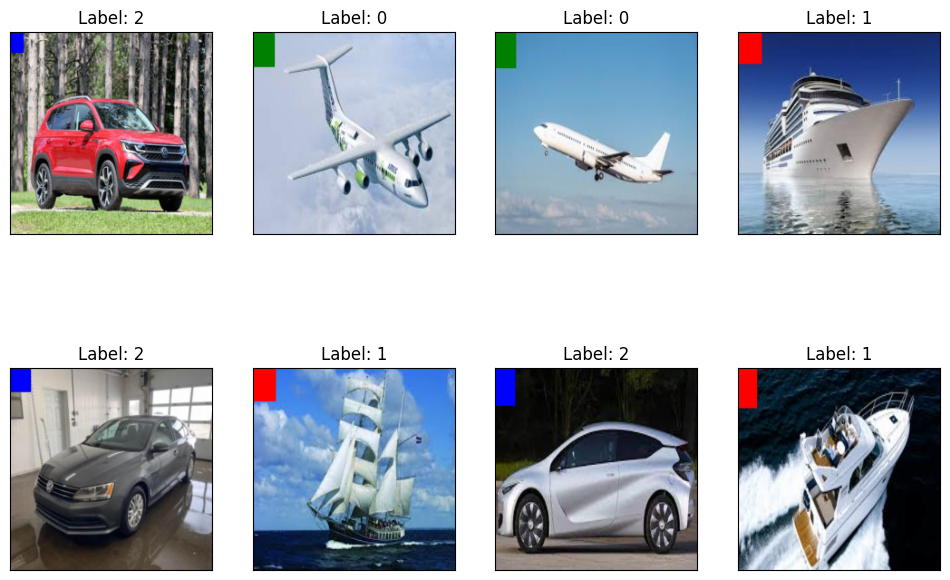

In [ ]:
transform_alea = Transform_alea()
# Création du dataset de validation avec l'ajout des carré colorés et permuté aléatoirement lentre les différents étiquettes
def custom_collate_fn(batch):
    images, labels = zip(*batch)

    # Convertit les images en tensor
    images = torch.stack(images, dim=0)

    # Convertit les labels en indices numériques, puis en tensor
    labels = torch.tensor([class_to_index[label] if isinstance(label, str) else label for label in labels], dtype=torch.long)

    return images, labels
dataset_validation = MonDatasetImages(dossier_racine=chemin_dossier_racine + '/validation', transform=transform_alea)
# Création du dataloader correspondant
data_loader_validation = DataLoader(dataset_validation, batch_size=32, shuffle=True, collate_fn=custom_collate_fn)
# Affichage d'une partie du dataloader pour vérifier si la transformation a bien été appliqué sur le dataset
print("Images de validation avec ajout des carrés colorés  permutées entre les classes:")
afficher_images_dataloader(data_loader_validation)
plt.show()


In [ ]:
for inputs, labels in data_loader_entrainement:
    print(type(inputs), type(labels))

<class 'torch.Tensor'> <class 'torch.Tensor'>


In [ ]:
# Fonction d'entraînement
import torch
from torch import nn, optim

# Assumons que 'device' est déjà défini, par exemple:
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Fonction d'entraînement

def train_model(model, criterion, optimizer, data_loader_entrainement, data_loader_validation, num_epochs=10):
    history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in (data_loader_entrainement if phase == 'train' else data_loader_validation):
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(data_loader_entrainement.dataset if phase == 'train' else data_loader_validation.dataset)
            epoch_acc = running_corrects.double() / len(data_loader_entrainement.dataset if phase == 'train' else data_loader_validation.dataset)

            history[f'{phase}_loss'].append(epoch_loss)
            history[f'{phase}_acc'].append(epoch_acc)

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

    print('Training complete')
    return model, history


# Entraînement du modèle
#model_trained = train_model(vgg16, criterion, optimizer, data_loader_entrainement, data_loader_validation, num_epochs=16)


In [ ]:
# Entrainement du modèle avec l'attaque adverserielle au niveau des données de validation

# Adaptation du modèle VGG16 avec les premières couches gelées
vgg16 = models.vgg16(pretrained=True)
for param in vgg16.features.parameters():
    param.requires_grad = False  # Geler les couches convolutives

num_features = vgg16.classifier[6].in_features
vgg16.classifier[6] = nn.Linear(num_features, 3)  # Adapter pour 3 classes

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vgg16.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(vgg16.classifier[6].parameters(), lr=0.001, momentum=0.9)  # Optimisation de la dernière couche uniquement
 # Dictionnaire pour stocker l'historique de la performance
history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}

model_trained, model_history = train_model(vgg16, criterion, optimizer, data_loader_entrainement, data_loader_validation, num_epochs=10)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/10
----------
train Loss: 1.1961 Acc: 0.3182
val Loss: 1.0099 Acc: 0.3750
Epoch 2/10
----------
train Loss: 1.1446 Acc: 0.3636
val Loss: 0.8459 Acc: 0.7500
Epoch 3/10
----------
train Loss: 0.8414 Acc: 0.6818
val Loss: 0.6828 Acc: 0.7500
Epoch 4/10
----------
train Loss: 0.4661 Acc: 0.9545
val Loss: 0.5515 Acc: 0.8750
Epoch 5/10
----------
train Loss: 0.2806 Acc: 1.0000
val Loss: 0.4448 Acc: 1.0000
Epoch 6/10
----------
train Loss: 0.2217 Acc: 0.9545
val Loss: 0.3557 Acc: 1.0000
Epoch 7/10
----------
train Loss: 0.1163 Acc: 1.0000
val Loss: 0.2888 Acc: 1.0000
Epoch 8/10
----------
train Loss: 0.0707 Acc: 1.0000
val Loss: 0.2384 Acc: 1.0000
Epoch 9/10
----------
train Loss: 0.0762 Acc: 1.0000
val Loss: 0.1981 Acc: 1.0000
Epoch 10/10
----------
train Loss: 0.0465 Acc: 1.0000
val Loss: 0.1661 Acc: 1.0000
Training complete


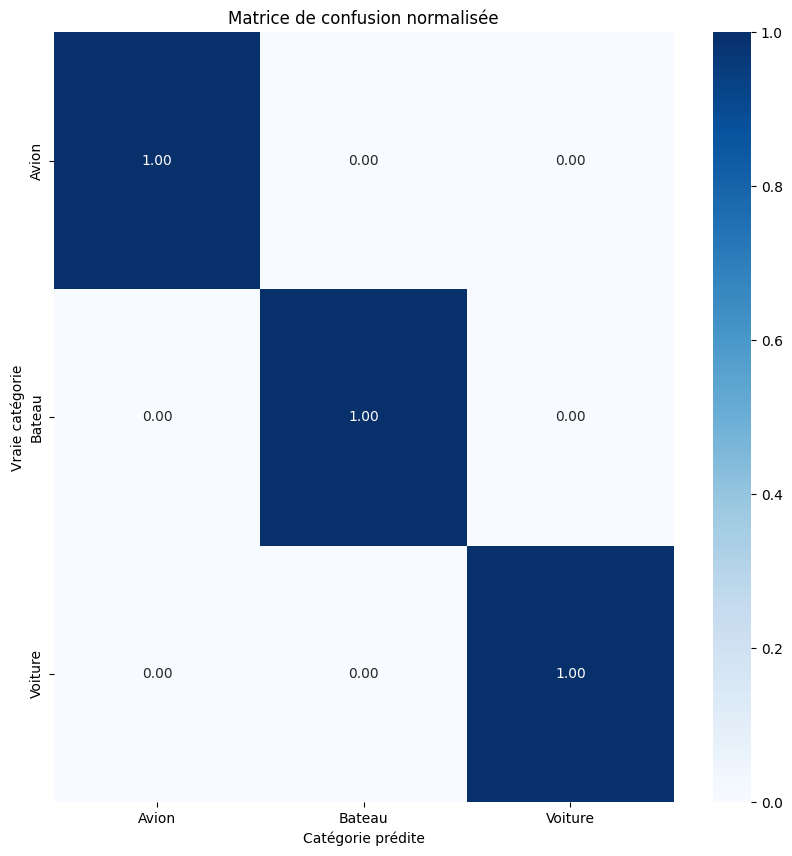

In [ ]:

# Génération de la matrice de confusion pour l'ensemble de validation
generate_confusion_matrix(model_trained, data_loader_validation, device)

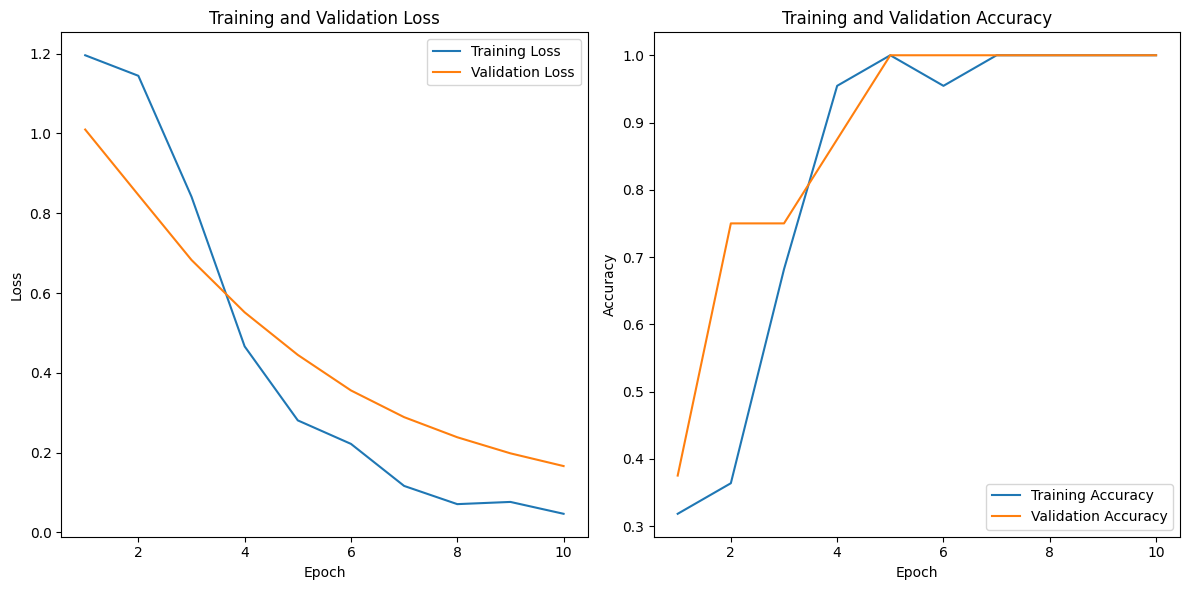

In [ ]:
# courbes d’apprentissage, les performances finales sur l’ensemble d’entraînement et de validation
plot_learning_curves(model_history)

**--- En ce qui concerne l'attaque adverserielle, voici les précautions à prendre:**

**-- Bien documenter sur comment les données ont été collecté**

**-- Test régulier de la robustesse des données face à des attaques adverses nouvellement découvertes**

**-- Intégrez la sécurité dans toutes les phases de la manipulation des données, depuis la collecte, le stockage, et le traitement, jusqu'à la modélisation**

**-- Protégez la confidentialité des données, surtout si elles contiennent des informations personnelles ou sensibles.**


**-- S'assurer que les données sont bien nettoyées et validées pour éviter les erreurs qui pourraient être exploitées.**

**-- Intégrez des exemples adverses dans l'ensemble de données de formation.**

**--S'assurer que les données sont vraiment representatives au niveau de toutes les classes constituant le dataset**

**--Il est important d'inclure une large variétés d'exemples dans l'ensemble du dataset**



In [ ]:
# Interpretation des résultats obtenus:

-- Selon les scores obtenus: 100 % de precision pour l'entrainement et 100 % de precision pour le test, on peut dire que le modèle généralise bien la prédiction: Ce qui confirme les résultats obtenus au niveau de la matrice de confusion qui nous montre que toutes les classes ont été bien prédictes.

-- On peut noter qu'à  certains étapes durant l'apprentissage du modèle, la precision du test est largement supérieur à celle de l'apprentissage et à partir d'un certain époque la precision de l'entrainement égale celle du test et vaut 100 %

--- Avec ces résultats, on peut dire que le modèle serait bien ajusté, pour confirmer cela testons donc le modèle sur un autre ensemble de données

**--- Test du modèle sur de nouvelles données**

In [ ]:
# Chargement des données de test

from torchvision import transforms
from torch.utils.data import DataLoader

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Chemin vers le dossier contenant les données de test
chemin_dossier_racine = chemin + 'dataset2/'



dataset_test = MonDatasetImages(dossier_racine=chemin_dossier_racine + '/test', transform=transform)

def custom_collate_fn(batch):
    images, labels = zip(*batch)

    # Convertit les images en tensor
    images = torch.stack(images, dim=0)

    # Convertit les labels en indices numériques, puis en tensor
    labels = torch.tensor([class_to_index[label] if isinstance(label, str) else label for label in labels], dtype=torch.long)

    return images, labels

data_loader_test = DataLoader(dataset_test, batch_size=32, shuffle=True, collate_fn=custom_collate_fn)


In [ ]:
# Fonction d'évaluation du modèle

def evaluate_model(model, data_loader, device):
    model.to(device)
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy sur le nouveau data set: {accuracy:.2f}%')


In [ ]:
# Déterminer le périphérique à utiliser
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Appeler la fonction d'évaluation avec le modèle formé et le nouveau DataLoader
evaluate_model(model_trained, data_loader_test, device)


Accuracy sur le nouveau data set: 100.00%


La précision d'une valeur de 100 % surle nouveau dataset de test confirme bien la généralisation forte du modèle: le modèle a donc été bien entrainé alors le modèle a été bien ajusté et généralise très bien: pas donc de sur-apprentissage ni de sous-apprentissage du modèle.